In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import plotly.io as pio

pio.renderers.default = "notebook_connected" # will supposedly render nbviewer
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Download a lookup table for national country code, then remove text in parentheses
df_country_lookup = pd.read_html('https://www.iban.com/country-codes')[0]
df_country_lookup = df_country_lookup[['Country', 'Alpha-2 code']]
df_country_lookup['Country'] = df_country_lookup['Country'].str.replace(r"\(.*\)","")
country_dict = df_country_lookup.set_index('Alpha-2 code').to_dict()['Country']
country_dict['NM'] = 'Namibia'
country_dict[np.nan] = np.nan

/var/folders/0_/1j63yf617y94nn64n_chcq580000gn/T/ipykernel_64022/559391023.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [3]:
df = pd.read_csv('../data/miner_and_region.csv', index_col=[0])
df = df[(df.raw_byte_power > 0) & (df.blocks_mined > 0) & (df.rewards > 0)]
df_split = df.region.str.split('-',n=0, expand=True)
df_split = df_split[df_split.columns[0]]

# Map region abbreviation to region
df['region'] = df_split.map({'AS': 'Asia', 'NA': 'North America', 'EU': 'Europe', 'OC': 
                             'Oceania', 'SA': 'South America', 'AF': 'Africa'})
df['country'] = df['country'].map(country_dict)



In [6]:
df.head()

,miner_id,raw_byte_power,quality_adj_power,blocks_mined,win_count,rewards,balance,miner,region,long,lat,numLocations,country,city,subdiv1,text
647,f0101087,2.592580e+15,2.595133e+15,505,505,10760.266140,15633.752759,f0101087,Asia,126.97410,37.511200,1.0,Korea,NaN,NaN,<b>Miner ID</b> f0101087<br><b>Rewards</b> 107...
925,f01016882,1.396071e+15,1.396071e+15,572,572,12277.216846,9919.672221,f01016882,Asia,119.36849,33.013798,1.0,China,Jiangsu,NaN,<b>Miner ID</b> f01016882<br><b>Rewards</b> 12...
931,f01029008,2.245993e+15,2.245993e+15,1024,1025,23892.733068,17283.023602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,f01033390,8.141265e+15,8.141265e+15,1362,1363,29354.946998,49635.992867,f01033390,Asia,114.02597,22.546053,1.0,China,Shenzhen,NaN,<b>Miner ID</b> f01033390<br><b>Rewards</b> 29...
945,f01038861,1.044570e+15,1.044570e+15,407,407,9112.858925,7046.489837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['text'] = '<b>Miner ID</b> ' +  df['miner_id'] + '<br>' +\
             '<b>Rewards</b> ' +  df['rewards'].astype(int).astype(str) + '<br>' +\
             '<b>Blocks mined</b> ' +  df['blocks_mined'].astype(int).astype(str) + '<br>' +\
             '<b>Balance</b> ' + df['balance'].astype(int).astype(str) + '<br>' + \
             '<b>RB power (TiB)</b> ' + (df['raw_byte_power']/2**40).astype(int).astype(str) + '<br>' +\
             '<b>Location</b> ' + df['city'].fillna('Unknown') + '/' + df['country'] #+ '<br>'\

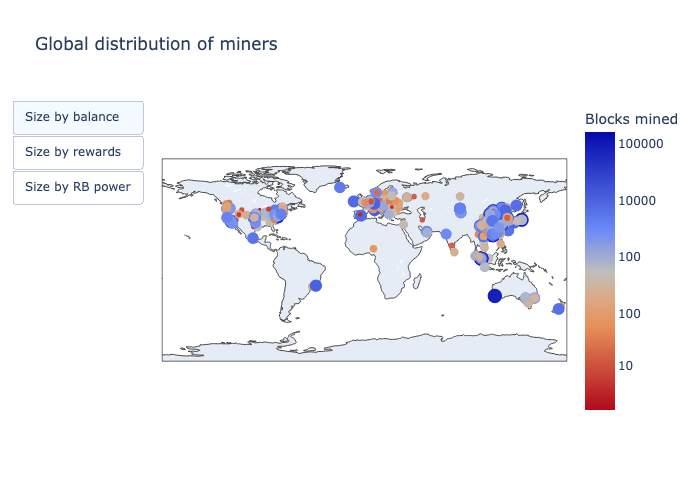

In [7]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = np.log1p(df['rewards']),
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0
            ),
#             colorscale = 'Viridis_r',
            cmin = 0,
            color = np.log1p(df['blocks_mined']),
            colorbar_title="Blocks mined",
            colorbar = dict(
                        tickvals=[0, np.log1p(1+10),np.log1p(1+100),np.log1p(1+1000), np.log1p(1+10000),np.log1p(1+100000)],
                        ticktext=[0,10,100,100,10000, 100000]
            )
        )
))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Size by balance",
                     method="restyle",
                     args=["marker", dict(
            size = np.log1p(df['balance']),
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0
            ),
            colorscale = 'Viridis_r',
            cmin = 0,
            color = np.log1p(df['blocks_mined']),
            colorbar_title="Blocks mined",
            colorbar = dict(
                        tickvals=[0, np.log1p(1+10),np.log1p(1+100),np.log1p(1+1000), np.log1p(1+10000),np.log1p(1+100000)],
                        ticktext=[0,10,100,100,10000, 100000]
            )
        ), [0]]),
                dict(label="Size by rewards",
                     method="restyle",
                     args=["marker", dict(
            size = np.log1p(df['rewards']),
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0
            ),
            colorscale = 'Viridis_r',
            cmin = 0,
            color = np.log1p(df['blocks_mined']),
            colorbar_title="Blocks mined",
            colorbar = dict(
                        tickvals=[0, np.log1p(1+10),np.log1p(1+100),np.log1p(1+1000), np.log1p(1+10000),np.log1p(1+100000)],
                        ticktext=[0,10,100,100,10000, 100000]
            )
        ), [0]]),

                dict(label="Size by RB power",
                     method="restyle",
                     args=["marker", dict(
            size = np.log1p(df['raw_byte_power']/2**40),
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0
            ),
            colorscale = 'Viridis_r',
            cmin = 0,
            color = np.log1p(df['blocks_mined']),
            colorbar_title="Blocks mined",
            colorbar = dict(
                        tickvals=[0, np.log1p(1+10),np.log1p(1+100),np.log1p(1+1000), np.log1p(1+10000),np.log1p(1+100000)],
                        ticktext=[0,10,100,100,10000, 100000]
            )
        ), [0]])
                
                
            ],
        )
    ]
)

fig.update_layout(title_text='Global distribution of miners')
fig.show()
img_bytes = fig.to_image(format="png")    
Image(img_bytes)

In [30]:
df_country = (df.groupby('country').sum()['raw_byte_power'])/2**50
df_country = df_country.sort_values(ascending=False)

df_region = (df.groupby('region').sum()['raw_byte_power'])/2**50
df_region = df_region.sort_values(ascending=False)

fig = go.Figure()

region_plot = go.Bar(x=df_region.index[0:10],
                y=df_region[0:10], 
                marker=dict(color="crimson"), 
                showlegend=False)
country_plot = go.Bar(x=df_country.index[0:10],
                y=df_country[0:10], 
                marker=dict(color="mediumblue"), 
                showlegend=False, visible=False)

data = [region_plot, country_plot]

updatemenus = list([
    dict(
         buttons=list([   
            dict(label = 'Region',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Top miner regions'}]),

            dict(label = 'Country',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Top miner countries'}])
        ]),
    )
])

layout = dict(title='Top miner regions', showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
pio.show(fig, auto_open=False, show_link=False)
